In [32]:
#----------IMPORTS-----------
import matplotlib as mpl
import numpy as np
import math
from matplotlib import pyplot as plt

#----------CLASSES-----------
# define the ball object
class Ball:
  def __init__(self, x, z, vx, vz, t):
    self.x = x
    self.z = z
    self.vx = vx
    self.vz = vz
    self.t = t

  def update_ball_no_drag(self, delta_t, g):
    self.x = self.x + delta_t * self.vx
    self.z = self.z + delta_t * self.vz
    self.vx = self.vx
    self.vz = self.vz + delta_t * (-g)
    self.t = self.t + delta_t

  def update_ball_linear_drag(self, delta_t, g, alfa):
    self.x = self.x + delta_t * self.vx
    self.z = self.z + delta_t * self.vz
    self.vx = self.vx - alfa * self.vx * delta_t
    self.vz = self.vz - (g + alfa * self.vz) * delta_t
    self.t = self.t + delta_t

  def update_ball_squere_drag(self, norm_v, delta_t, g, alfa):
    self.vx = self.vx - alfa * norm_v * self.vx * delta_t
    self.x = self.x + self.vx * delta_t
    self.vz = self.vz - (g + alfa * norm_v * self.vz) * delta_t
    self.z = self.z + self.vz * delta_t

#----------INITIALS-----------
# specify initial conditions and const values
m = 1 # ball weight in kgs
g = 10 # gravitation in m/s
x0 = 0 # initial x position in meters
z0 = 0 # initial z position in meters
t0 = 0 # initial time in seconds
v0 = 100 #initial ball speed in m/s

# other variables
dt = 0.001 # time step in seconds
#----------FUNCTIONS-----------

#----------NON DRAG CONDITIONS-----------
def best_alfa_no_drag(x0 = 0, z0 = 0, v0 = 0, t0 = 0, dt = 0, x_distance = 0, alfas = 0):
  '''Finds the most optimal throw angle for no drag conditions'''
  x_distance = [] # distance the ball flew
  alfas = [] # throws angles
  for alfa in range(0,91):
    v0x = v0 * np.cos(alfa * np.pi / 180) # initial x speed
    v0z = v0 * np.sin(alfa * np.pi / 180) # initial z speed
    ball = Ball(x0, z0, v0x, v0z, t0) # create Ball object
    while ball.z >= 0: # condition that finishes the loop when ball hits the ground
      ball.update_ball_no_drag(dt, g)
    x_distance.append(ball.x) # assigns value of x when ball hits the ground
    alfas.append(alfa) # assigns value of alfa
  best_throw= x_distance.index(max(x_distance))
  max_dist = x_distance[best_throw]
  best_angle = alfas[best_throw]
  print('Most optimal deg for no drag is {} with distance {}m\n'.format(best_angle, round((max_dist), 2)))
  plotter_no_drag(x0, z0, v0, t0, dt, best_angle, 'no_drag')

def plotter_no_drag(x0, z0, v0, t0, dt, alfa, drag):
  '''Plots the flight of the most optimal throw'''
  v0x = v0 * np.cos(alfa * math.pi / 180) # initial x speed for best alfa
  v0z = v0 * np.sin(alfa * math.pi / 180) # initial z speed for best alfa
  top_throw = Ball(x0, z0, v0x, v0z, t0) # create Ball object for best throw
  list_x = [x0] # initialize list of x coordinates
  list_z = [z0] # initialize list of z coordinates

  while top_throw.z >= 0:
    top_throw.update_ball_no_drag(dt, g)
    list_x.append(top_throw.x)
    list_z.append(top_throw.z)

  fig, ax = plt.subplots()
  ax.plot(list_x, list_z)
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  plt.title(str(alfa)+'deg, '+str(drag))
  plt.xlabel('X')
  plt.ylabel('Z')

#----------LINEAR DRAG CONDITIONS-----------

def best_alfa_linear_drag(x0 = 0, z0 = 0, v0 = 0, t0 = 0, dt = 0, x_distance = 0, alfas = 0):
  '''Finds the most optimal throw angle for linear drag conditions'''
  x_distance = [] # distance the ball flew
  alfas = [] # throws angles
  for alfa in range(0,91):
    v0x = v0 * np.cos(alfa * np.pi / 180) # initial x speed
    v0z = v0 * np.sin(alfa * np.pi / 180) # initial z speed
    ball = Ball(x0, z0, v0x, v0z, t0) # create Ball object
    while ball.z >= 0: # condition that finishes the loop when ball hits the ground
      ball.update_ball_linear_drag( dt, g, 0.01)
    x_distance.append(round(ball.x, 2)) # assigns value of x when ball hits the ground
    alfas.append(alfa) # assigns value of alfa
  best_throw = x_distance.index(max(x_distance))
  max_dist = x_distance[best_throw]
  best_angle = alfas[best_throw]
  print('Most optimal deg for linear drag is {} with distance {}m\n'.format(best_angle, round((max_dist), 2)))
  plotter_linear_drag(x0, z0, v0, t0, dt, best_angle, 'linear_drag')


def plotter_linear_drag(x0, z0, v0, t0, dt, alfa, drag):
  '''Plots the flight of the most optimal throw'''
  v0x = v0 * np.cos(alfa * math.pi / 180) # initial x speed for best alfa
  v0z = v0 * np.sin(alfa * math.pi / 180) # initial z speed for best alfa
  top_throw = Ball(x0, z0, v0x, v0z, t0) # create Ball object for best throw
  list_x = [x0] # initialize list of x coordinates
  list_z = [z0] # initialize list of z coordinates

  while top_throw.z >= 0:
    top_throw.update_ball_linear_drag(dt, g, 0.01)
    list_x.append(top_throw.x)
    list_z.append(top_throw.z)

  fig, ax = plt.subplots()
  ax.plot(list_x, list_z)
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  plt.title(str(alfa)+'deg, '+str(drag))
  plt.xlabel('X')
  plt.ylabel('Z')

 #----------SQUERE DRAG CONDITIONS----------- 

def best_alfa_squere_drag(x0 = 0, z0 = 0, v0 = 0, t0 = 0, dt = 0, x_distance = 0, alfas = 0):
  '''Finds the most optimal throw angle for squere drag conditions'''
  x_distance = [] # distance the ball flew
  alfas = [] # throws angles
  for alfa in range(0,91):
    v0x = v0 * np.cos(alfa * np.pi / 180) # initial x speed
    v0z = v0 * np.sin(alfa * np.pi / 180) # initial z speed
    norm_v = math.sqrt(v0x ** 2 + v0z ** 2)
    ball = Ball(x0, z0, v0x, v0z, t0) # create Ball object
    while ball.z >= 0: # condition that finishes the loop when ball hits the ground
      ball.update_ball_squere_drag(norm_v, dt, g, 0.00025)
      norm_v = math.sqrt(ball.vx ** 2 + ball.vz ** 2)
    x_distance.append(round(ball.x, 2)) # assigns value of x when ball hits the ground
    alfas.append(alfa) # assigns value of alfa
  best_throw = x_distance.index(max(x_distance))
  max_dist = x_distance[best_throw]
  best_angle = alfas[best_throw]
  print('Most optimal deg for squere drag is {} with distance {}m\n'.format(best_angle, round((max_dist), 2)))
  plotter_squere_drag(x0, z0, v0, t0, dt, best_angle, 'squere_drag')

def plotter_squere_drag(x0, z0, v0, t0, dt, alfa, drag):
  '''Plots the flight of the most optimal throw'''
  v0x = v0 * np.cos(alfa * math.pi / 180) # initial x speed for best alfa
  v0z = v0 * np.sin(alfa * math.pi / 180) # initial z speed for best alfa
  norm_v = math.sqrt(v0x ** 2 + v0z ** 2)
  top_throw = Ball(x0, z0, v0x, v0z, t0) # create Ball object for best throw
  list_x = [x0] # initialize list of x coordinates
  list_z = [z0] # initialize list of z coordinates
  while top_throw.z >= 0:
    top_throw.update_ball_squere_drag(norm_v, dt, g, 0.00025)
    norm_v = math.sqrt(top_throw.vx ** 2 + top_throw.vz ** 2)
    list_x.append(top_throw.x)
    list_z.append(top_throw.z)
  fig, ax = plt.subplots()
  ax.plot(list_x, list_z)
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  plt.title(str(alfa)+'deg, '+str(drag))
  plt.xlabel('X')
  plt.ylabel('Z')

#----------EACH CONDITIONS FOR 45DEG PLOTTER-----------

def plotter_all_ff(x0, z0, v0, t0, dt, alfa = 45):
  '''Plots the flight of the most optimal throw'''
  v0x = v0 * np.cos(alfa * math.pi / 180) # initial x speed for 45 deg
  v0z = v0 * np.sin(alfa * math.pi / 180) # initial z speed for 45 deg
  list_x_no_drag = [x0] # initialize list of x coordinates
  list_z_no_drag = [z0] # initialize list of z coordinates
  list_x_linear_drag = [x0] # initialize list of x coordinates
  list_z_linear_drag = [z0] # initialize list of z coordinates
  list_x_squere_drag = [x0] # initialize list of x coordinates
  list_z_squere_drag = [z0] # initialize list of z coordinates
  ff_no_drag = Ball(x0, z0, v0x, v0z, t0) # ff as fourty-five :)
  ff_linear_drag = Ball(x0, z0, v0x, v0z, t0)
  ff_squere_drag = Ball(x0, z0, v0x, v0z, t0)

  while ff_no_drag.z >= 0:
    ff_no_drag.update_ball_no_drag(dt, g)
    list_x_no_drag.append(ff_no_drag.x)
    list_z_no_drag.append(ff_no_drag.z)

  while ff_linear_drag.z >= 0:
    ff_linear_drag.update_ball_linear_drag(dt, g, 0.01)
    list_x_linear_drag.append(ff_linear_drag.x)
    list_z_linear_drag.append(ff_linear_drag.z) 

  norm_v = math.sqrt(v0x ** 2 + v0z ** 2)
  while ff_squere_drag.z >= 0:
    ff_squere_drag.update_ball_squere_drag(norm_v, dt, g, 0.00025)
    norm_v = math.sqrt(ff_squere_drag.vx ** 2 + ff_squere_drag.vz ** 2)
    list_x_squere_drag.append(ff_squere_drag.x)
    list_z_squere_drag.append(ff_squere_drag.z)

  plt.plot(list_x_no_drag, list_z_no_drag, color='r', label='no_drag')
  plt.plot(list_x_linear_drag, list_z_linear_drag, color='g', label='linear_drag')
  plt.plot(list_x_squere_drag, list_z_squere_drag, color='y', label='squere_drag')

  plt.xlabel("X")
  plt.ylabel("Z")
  plt.title("45deg")
  plt.legend()

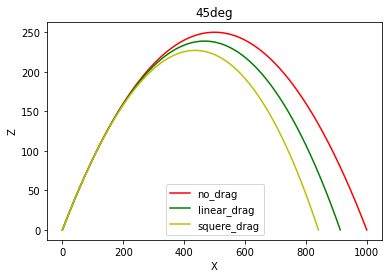

In [38]:
# uncomment function you are interested in
#----------MOST EFFECTIVE ANGLES-----------
# compute the most effective angle and related distance for non drag conditions
# best_alfa_no_drag(x0, z0, v0, t0, dt)
# compute the most effective angle and related distance for linear drag conditions
# best_alfa_linear_drag(x0, z0, v0, t0, dt) 
# compute the most effective angle and related distance for squere drag conditions
# best_alfa_squere_drag(x0, z0, v0, t0, dt)

#----------COMPARE CONDITIONS IN 45DEG-----------
# plots flight paths for each conditions for 45deg angle
plotter_all_ff(x0, z0, v0, t0, dt, 45)